In [2]:
## Add more markdown explaining steps in notebook

# **Introduction**: The goal of this notebook is to create a machine learning model to accurately predict cases of car insurance fraud and to understand what characterisitcs in a claim are most indicative of fraud

Data: https://www.kaggle.com/roshansharma/insurance-claim

GitHub: https://github.com/ArielJosephCohen/capstone

Presentation: https://docs.google.com/presentation/d/1oUIwD1Y3reYto43LgdyXyQJzksOHXzq6XmDgNv28LpU/edit#slide=id.p

# **Notebook**

## Imports

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import helper_module as hm
from helper_module import *
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv('Claims.csv')
df2 = pd.read_csv('Claims.csv')

## Randomness

In [5]:
seed = 14

## Look at data

In [6]:
print(df.shape)
(df.head())

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [11]:
plt.tight_layout()
#(sns.pairplot(df))

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b234bd0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

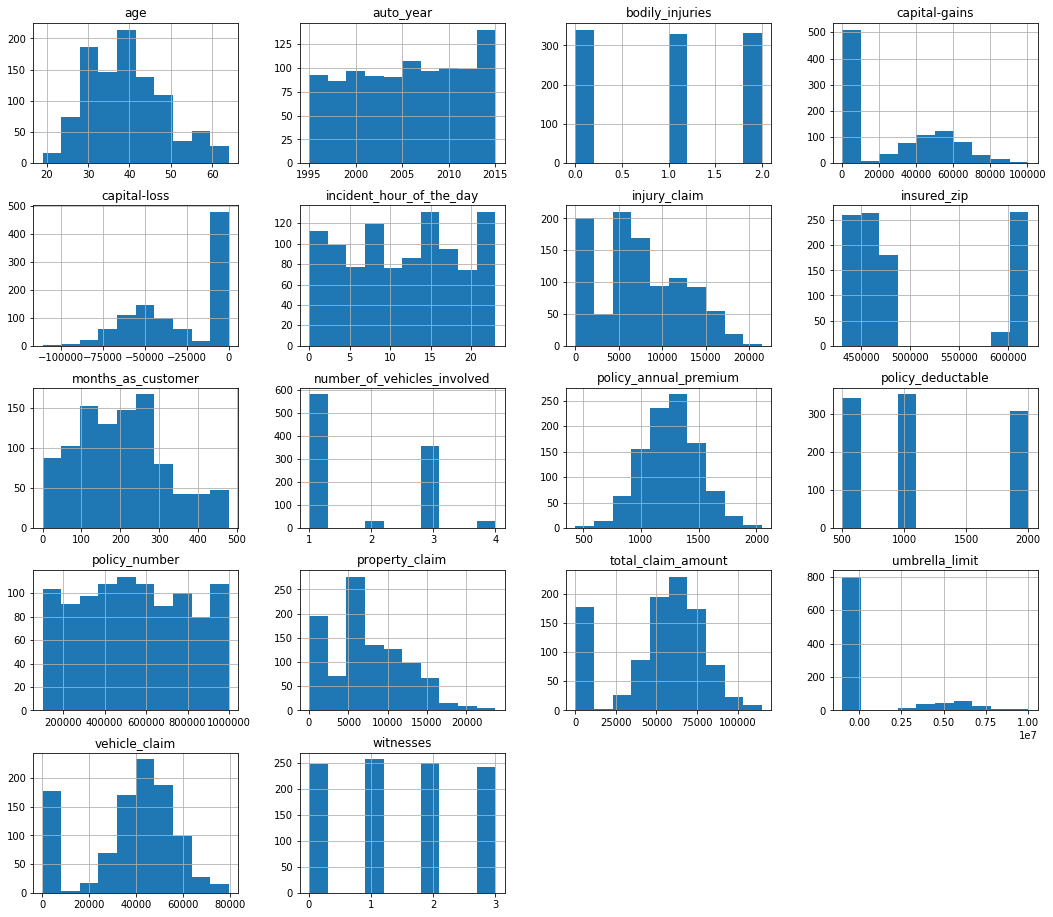

In [12]:
plt.tight_layout()
df.hist(figsize=(18,16))

## Exploratory data analysis

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
fraud_df = df[df['fraud_reported']=='Y']

In [15]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c6f8b10>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

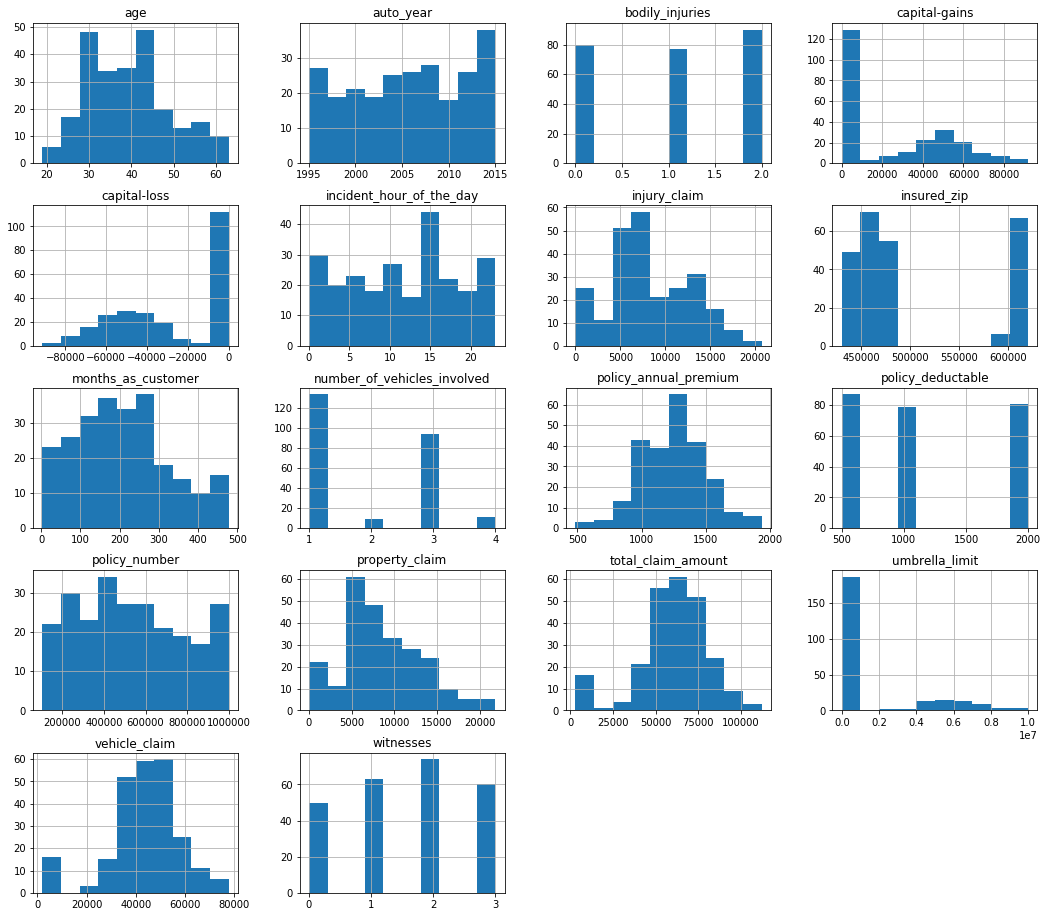

In [16]:
plt.tight_layout()
fraud_df.hist(figsize=(18,16))

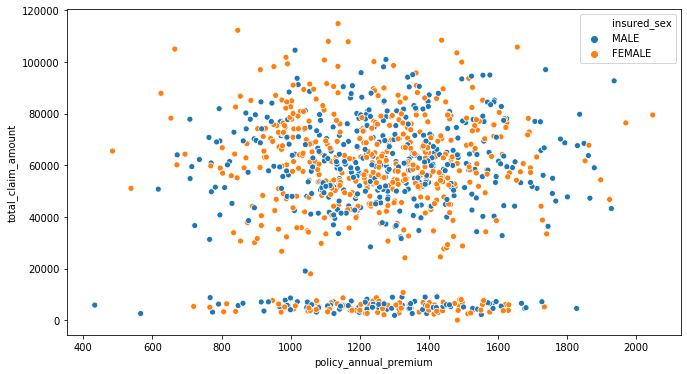

In [17]:
plt.figure(figsize=(11,6))
plt.tight_layout()
sns.scatterplot(df.policy_annual_premium,df.total_claim_amount,hue=df.insured_sex)

All


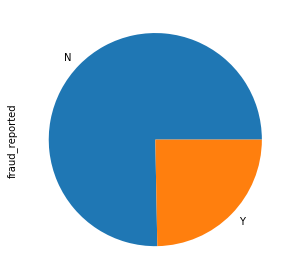

Illinois


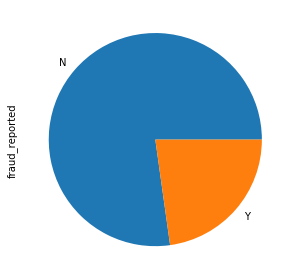

Indiana


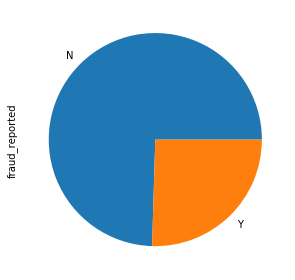

Ohio


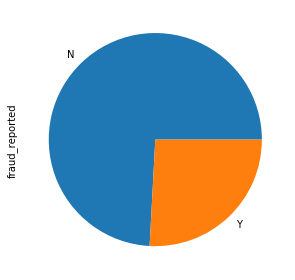

In [18]:
print('All')
df.fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Illinois')
df[df.policy_state=='IL'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Indiana')
df[df.policy_state=='IN'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()
print('Ohio')
df[df.policy_state=='OH'].fraud_reported.value_counts().plot(kind='pie')
plt.tight_layout()
plt.show()

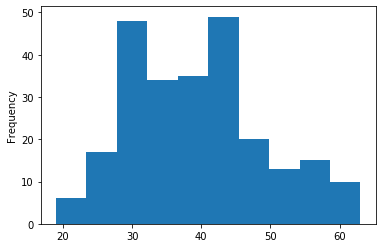

In [19]:
df[df.fraud_reported=='Y'].age.plot(kind='hist')

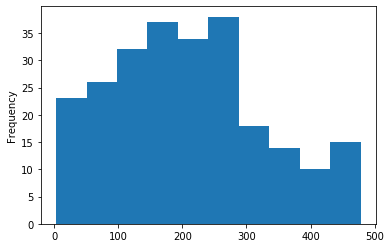

In [20]:
df[df.fraud_reported=='Y'].months_as_customer.plot(kind='hist')

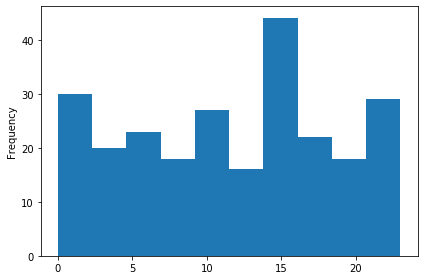

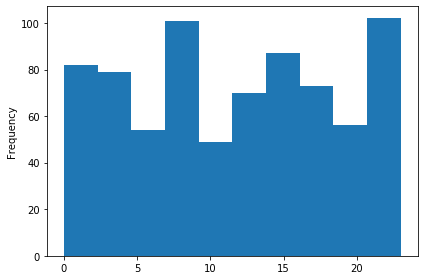

In [21]:
df[df.fraud_reported=='Y'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()
df[df.fraud_reported=='N'].incident_hour_of_the_day.plot(kind='hist')
plt.tight_layout()
plt.show()

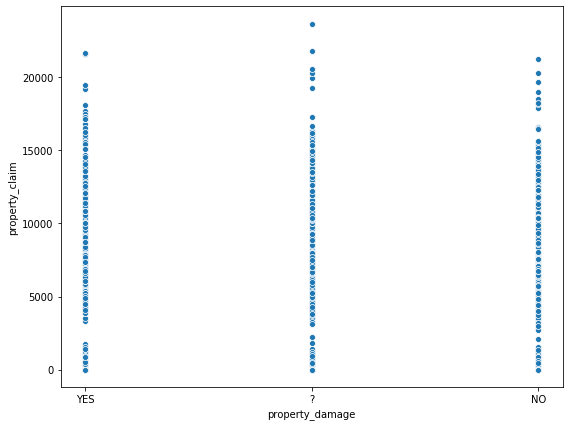

In [22]:
plt.figure(figsize=(9,7))
plt.tight_layout()
sns.scatterplot(df.property_damage,df.property_claim)

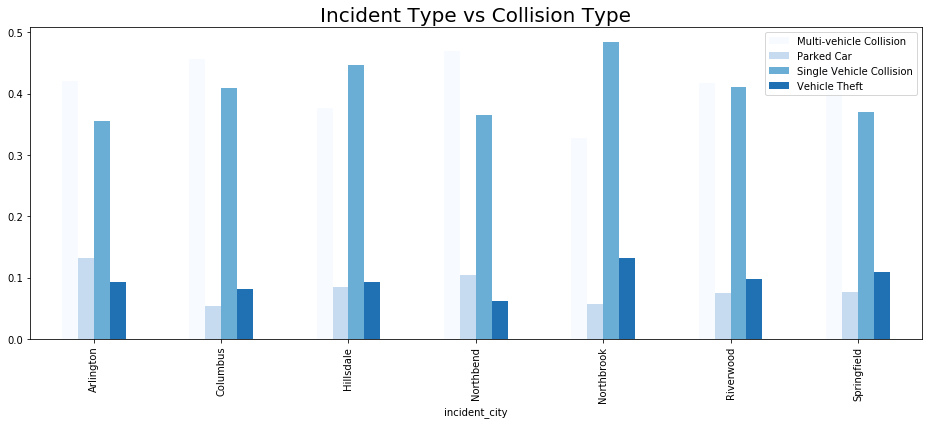

In [23]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (13, 6),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()

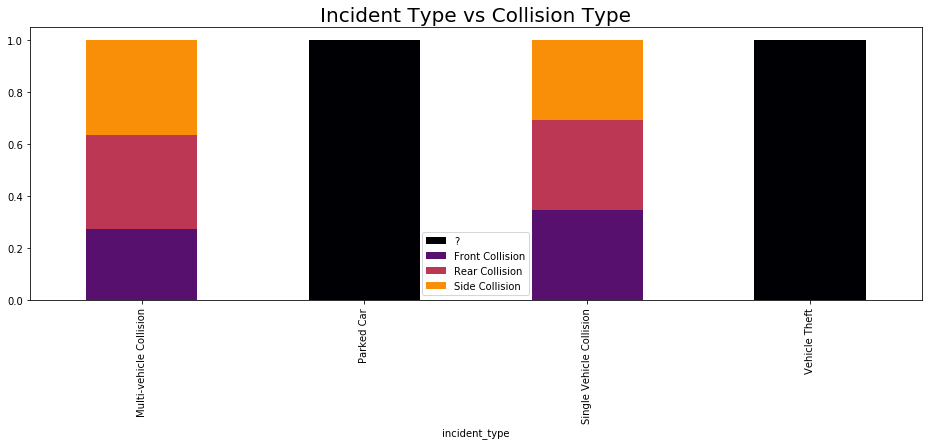

In [24]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (13, 6),
                                                           color = colors)

plt.tight_layout()
plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

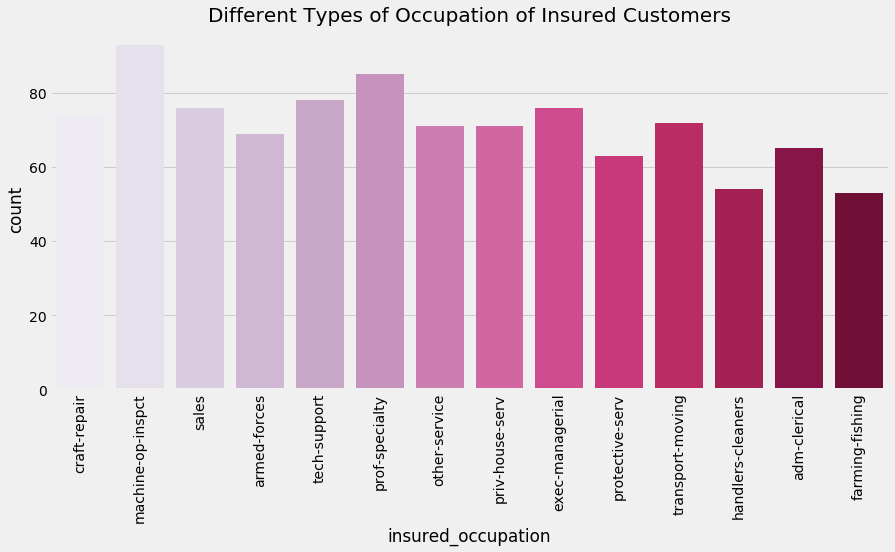

In [25]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

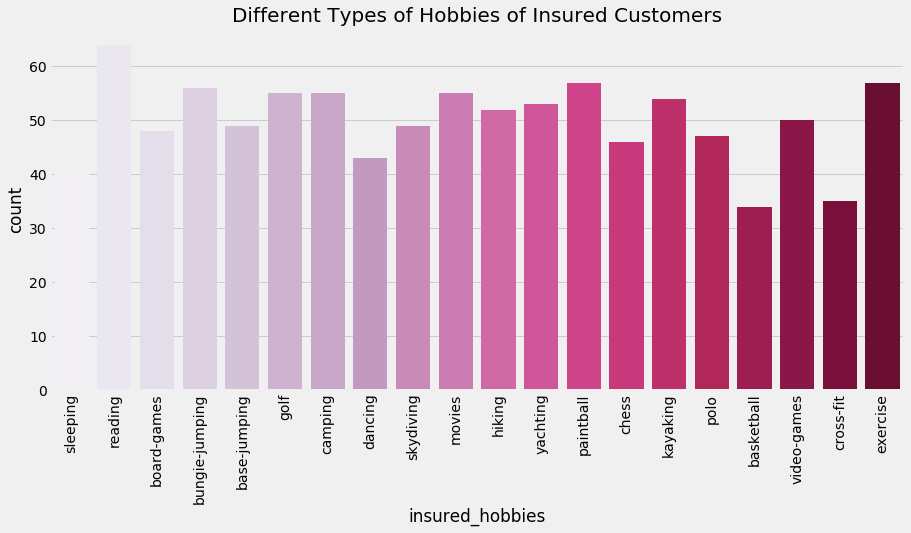

In [26]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['insured_hobbies'], palette = 'PuRd')
plt.tight_layout()
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

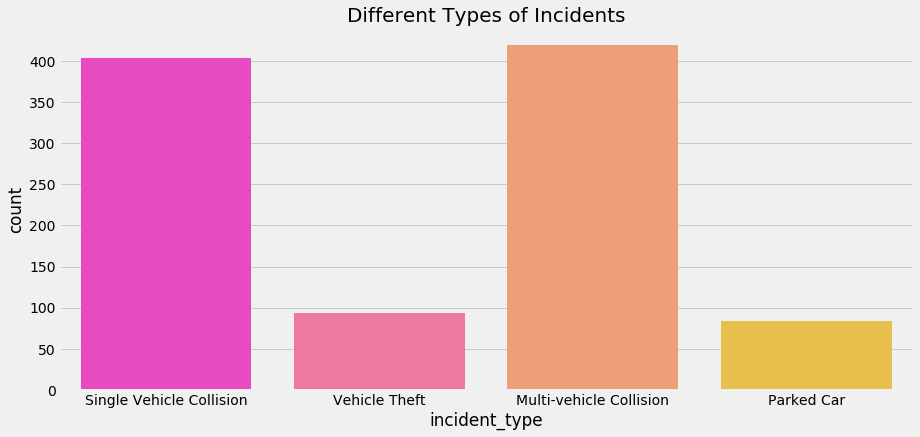

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(df['incident_type'], palette = 'spring')
plt.tight_layout()
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

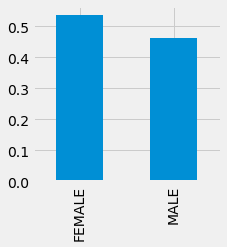

In [28]:
plt.figure(figsize=(3,3))
plt.tight_layout()
df.insured_sex.value_counts(normalize=True).plot(kind='bar')

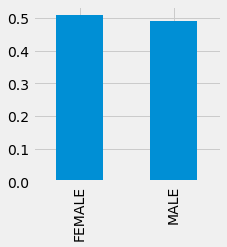

In [29]:
plt.figure(figsize=(3,3))
plt.tight_layout()
df[df.fraud_reported=='Y'].insured_sex.value_counts(normalize=True).plot(kind='bar')

## Address categorical and numerical features

In [30]:
def assign_fraud_binary(row):
    if row['fraud_reported'] == 'Y':
        return 1
    else:
        return 0

In [31]:
df['fraud_reported']=df.apply(assign_fraud_binary,axis=1)

In [32]:
df['policy_bind_month']=0
df['policy_bind_year']=0
df['incident_month']=0
df['incident_year']=0

for i in range(len(df)):
    df['policy_bind_month'][i]=int(str(df.incident_date[i]).split()[0][3:5])
    df['policy_bind_year'][i]= int(str(df.incident_date[i]).split()[0][6:10])
    df['incident_month'][i]= int(str(df.policy_bind_date[i]).split()[0][3:5])
    df['incident_year'][i]= int(str(df.policy_bind_date[i]).split()[0][6:10])
    


In [33]:
df.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [34]:
auto_model_dict = {'RAM':'Truck','Wrangler':'SUV','Neon':'Sedan','A3':'Sedan','MDX':'SUV','Jetta':'Sedan',
                   'Passat':'Sedan','A5':'Sedan', 'legacy':'Sedan','Pathfinder':'SUV','Malibu':'Sedan',
                   'Camry':'Sedan','Forrester':'SUV','92x':'Sedan','95':'Sedan','E400':'Sedan','F150':'Truck',
                   'Grand Cherokee':'SUV','93':'Sedan','Tahoe':'SUV','Escape':'SUV','Maxima':'Sedan','X5':'SUV',
                   'Ultima':'Sedan','Civic':'Sedan','Highlander':'SUV','Silverado':'Truck','Fusion':'Sedan',
                   'ML350':'SUV','Corolla':'Sedan','TL':'Sedan','CRV':'SUV','Impreza':'Sedan','3 Series':'Sedan',
                   'C300':'Sedan','X6':'SUV','M5':'Sedan','Accord':'Sedan','RSX':'Sedan','Legacy':'Sedan',
                   'Forrestor':'SUV'
                  }

In [35]:
df.auto_model=df.auto_model.map(lambda x: auto_model_dict[x])

In [36]:
df.auto_model.unique()

array(['Sedan', 'Truck', 'SUV'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [38]:
num_list = ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','witnesses','bodily_injuries','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

In [39]:
cat_list = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
cat_list.append('policy_bind_year')
cat_list.append('policy_bind_month')
cat_list.append('incident_year')
cat_list.append('incident_month')

In [40]:
cat_cols = []
cat_col_vals = []
for col in cat_list[1:]:
    cat_cols.append(col) 
    cat_col_vals.append(df[col].nunique())
    print (col,df[col].nunique())

policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
property_damage 3
police_report_available 3
auto_make 14
auto_model 3
fraud_reported 2
policy_bind_year 1
policy_bind_month 3
incident_year 26
incident_month 12


<Figure size 1080x576 with 0 Axes>

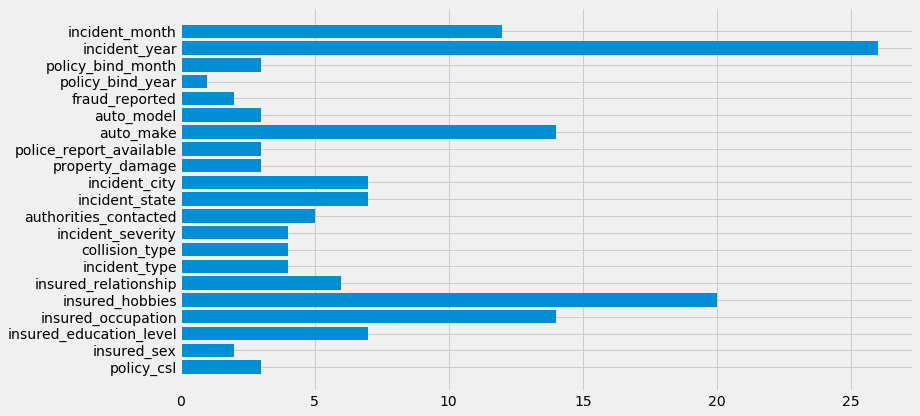

<Figure size 1080x576 with 0 Axes>

In [41]:
plt.barh(cat_cols,cat_col_vals)
plt.tight_layout()
plt.figure(figsize=(15,8))

In [42]:
df[cat_list].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month,incident_year,incident_month
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,Columbus,YES,YES,Saab,Sedan,1,2015,1,2014,10
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,...,Riverwood,?,?,Mercedes,Sedan,1,2015,1,2006,6
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,Columbus,NO,NO,Dodge,Truck,0,2015,2,2000,9
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,Arlington,?,NO,Chevrolet,SUV,1,2015,1,1990,5
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,...,Arlington,NO,NO,Accura,Sedan,0,2015,2,2014,6


In [43]:
df.policy_bind_date=pd.to_datetime(df.policy_bind_date)

In [44]:
def gender_val(row):
    if row['insured_sex'] == 'MALE':
        return 1
    else:
        return 0

In [45]:
df['insured_sex']=df.apply(gender_val,axis=1)

In [46]:
df.incident_date=pd.to_datetime(df.incident_date)

In [47]:
df['timeline']=df.incident_date-df.policy_bind_date

In [48]:
df[num_list].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,2,1,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,3,2,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,2,1,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,1,0,6500,1300,650,4550,2009


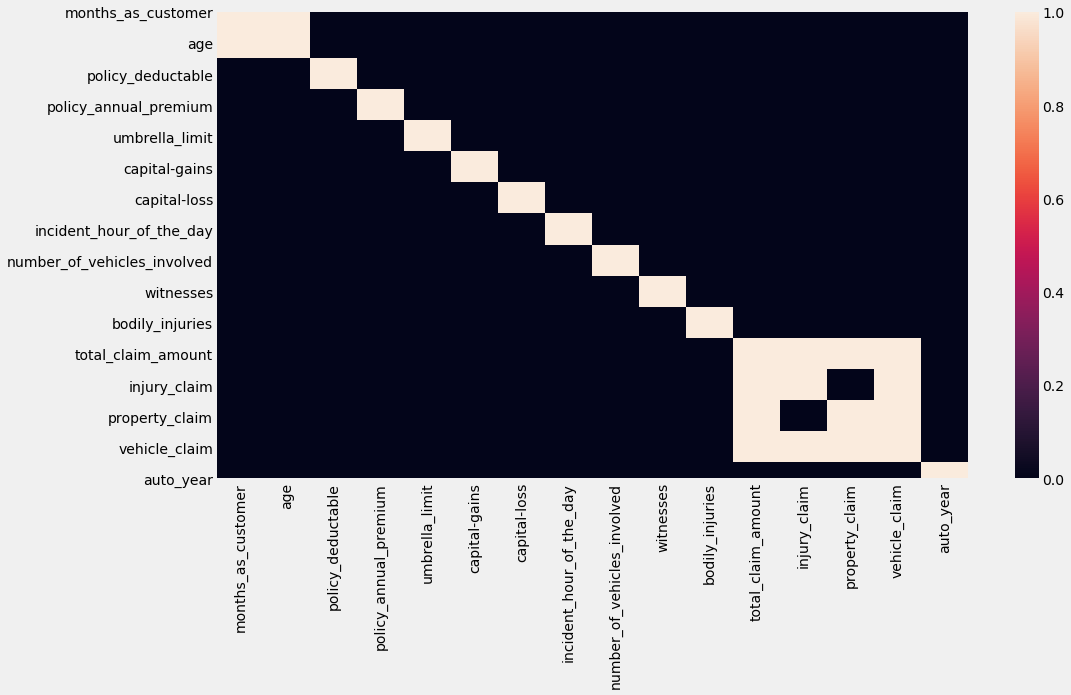

In [49]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [50]:
df.drop(['age','total_claim_amount'],axis=1,inplace=True)
num_list.remove('age')
num_list.remove('total_claim_amount')
num_list.remove('vehicle_claim')
df.drop(['vehicle_claim'],axis=1,inplace=True)

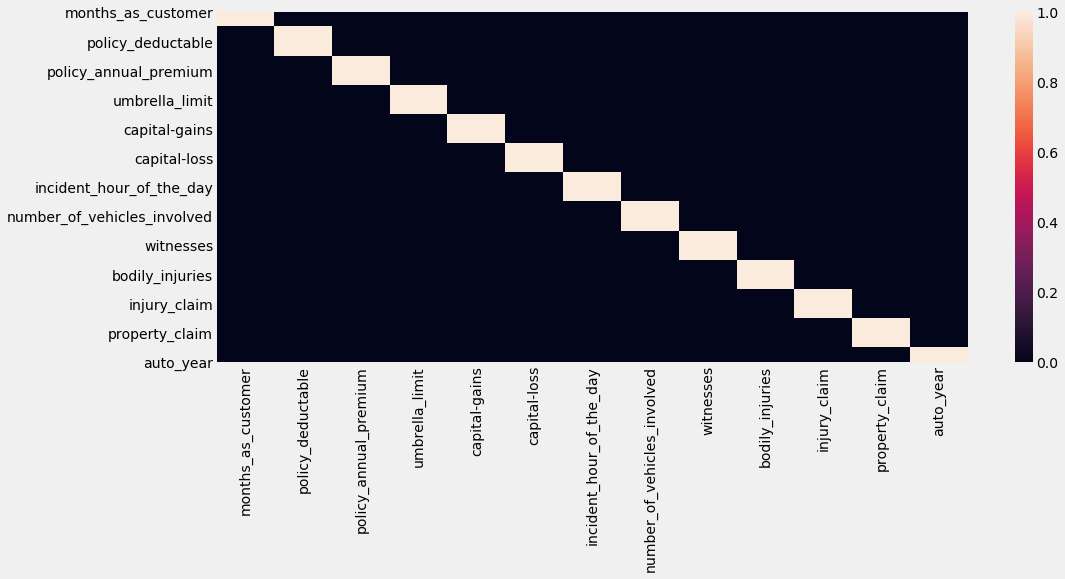

In [51]:
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.heatmap(df[num_list].corr()>=0.7)

In [52]:
int(str(df.timeline[0]).split()[0])

100

In [53]:
for i in range(len(df)):
    df.timeline[i] = int(str(df.timeline[i]).split()[0])
df.timeline=df.timeline.astype(int)

In [54]:
df.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

In [55]:
df.head()

,months_as_customer,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_month,incident_year,timeline
0,328,521585,OH,250/500,1000,1406.91,0,466132,1,MD,...,13020,Saab,Sedan,2004,1,1,2015,10,2014,100
1,228,342868,IN,250/500,2000,1197.22,5000000,468176,1,MD,...,780,Mercedes,Sedan,2007,1,1,2015,6,2006,3130
2,134,687698,OH,100/300,2000,1413.14,5000000,430632,0,PhD,...,3850,Dodge,Truck,2007,0,2,2015,9,2000,5371
3,256,227811,IL,250/500,2000,1415.74,6000000,608117,0,PhD,...,6340,Chevrolet,SUV,2014,1,1,2015,5,1990,9260
4,228,367455,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,...,650,Accura,Sedan,2009,0,2,2015,6,2014,256


In [56]:
num_list.append('timeline')

In [57]:
df_num = df[num_list]
df_cat = df[cat_list]

In [58]:
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,1300,650,2009,256


In [59]:
print(df_cat.shape)
df_cat.head()

(1000, 22)


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month,incident_year,incident_month
0,OH,250/500,1,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,Columbus,YES,YES,Saab,Sedan,1,2015,1,2014,10
1,IN,250/500,1,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,...,Riverwood,?,?,Mercedes,Sedan,1,2015,1,2006,6
2,OH,100/300,0,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,Columbus,NO,NO,Dodge,Truck,0,2015,2,2000,9
3,IL,250/500,0,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,Arlington,?,NO,Chevrolet,SUV,1,2015,1,1990,5
4,IL,500/1000,1,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,...,Arlington,NO,NO,Accura,Sedan,0,2015,2,2014,6


## Encode categorical data

In [60]:
cat_fraud=df_cat[df['fraud_reported']=='1']
print(len(cat_fraud))

0


In [61]:
df[['policy_state','fraud_reported']].groupby(['policy_state'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
2,OH,0.258523
1,IN,0.254839
0,IL,0.227811


In [62]:
state_dict = {'OH':1-0.259,'IN':1-0.255,'IL':1-0.228}

In [63]:
df_cat.policy_state=df.policy_state.map(lambda x: state_dict[x])

In [64]:
df[['policy_csl','fraud_reported']].groupby(['policy_csl'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [65]:
csl_dict={'250/500':1-0.262,'100/300':1-0.258,'500/1000':1-0.217}

In [66]:
df_cat.policy_csl=df.policy_csl.map(lambda x: csl_dict[x])

In [67]:
df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [68]:
education_dict={'JD':1-0.261,'MD':1-0.264,'High School':1-0.225,'Associate':1-0.234,
                'PhD':1-0.264,'College':1-0.262,'Masters':1-0.224}

In [69]:
df_cat.insured_education_level=df.insured_education_level.map(lambda x: education_dict[x])

In [70]:
df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [71]:
occupation_dict={'exec-managerial':1-0.368,'machine-op-inspct':1-0.237,'craft-repair':1-0.297,'tech-support':1-0.282,
                'sales':1-0.276,'transport-moving':1-0.292,'prof-specialty':1-0.212,'armed-forces':1-0.246,
                 'farming-fishing':1-0.302,'protective-serv':1-0.222,'other-service':1-0.169,
                 'priv-house-serv':1-0.169,'handlers-cleaners':1-0.204,'adm-clerical':1-0.169
                }

In [72]:
df_cat.insured_occupation=df.insured_occupation.map(lambda x: occupation_dict[x])

In [73]:
df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [74]:
hobby_dict = {'chess':1-0.826,'cross-fit':1-0.743,'reading':1-0.266,'yachting':1-0.302,'board-games':1-0.292,
            'paintball':1-0.228,'base-jumping':1-0.265,'polo':1-0.277,'hiking':1-0.231,'skydiving':1-0.224,
              'exercise':1-0.193,'video-games':1-0.2,'movies':1-0.164,'bungie-jumping':1-0.161,'sleeping':1-0.195,
              'basketball':1-0.176,'golf':1-0.109,'kayaking':1-0.093,'dancing':1-0.116,'camping':1-0.091
             }

In [75]:
df_cat.insured_hobbies=df.insured_hobbies.map(lambda x: hobby_dict[x])

In [76]:
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
2,other-relative,0.293785
5,wife,0.270968
1,not-in-family,0.258621
4,unmarried,0.241135
3,own-child,0.213115
0,husband,0.205882


In [77]:
relate_dict={'other-relative':1-0.294,'not-in-family':1-0.259,'wife':1-0.271,
             'own-child':1-0.213,'husband':1-0.206,'unmarried':1-0.241}

In [78]:
df_cat.insured_relationship=df.insured_relationship.map(lambda x: relate_dict[x])

In [79]:
df[['incident_type','fraud_reported']].groupby(['incident_type'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
2,Single Vehicle Collision,0.290323
0,Multi-vehicle Collision,0.272076
1,Parked Car,0.095238
3,Vehicle Theft,0.085106


In [80]:
incident_dict = {'Single Vehicle Collision':1-0.29,'Multi-vehicle Collision':1-0.272,'Vehicle Theft':1-0.085,
                 'Parked Car':1-0.095}

In [81]:
df_cat.incident_type=df.incident_type.map(lambda x: incident_dict[x])

In [82]:
df[['collision_type','fraud_reported']].groupby(['collision_type'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
2,Rear Collision,0.311644
1,Front Collision,0.275591
3,Side Collision,0.253623
0,?,0.089888


In [83]:
collision_dict = {'Rear Collision':1-0.312,'Front Collision':1-0.276,'Side Collision':1-0.254,'?':1-0.09}

In [84]:
df_cat.collision_type=df.collision_type.map(lambda x: collision_dict[x])

In [85]:
df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
0,Major Damage,0.605072
2,Total Loss,0.128571
1,Minor Damage,0.107345
3,Trivial Damage,0.066667


In [86]:
severity_dict={'Major Damage':1-0.605,'Minor Damage':1-0.107,'Total Loss':1-0.129,'Trivial Damage':1-0.067}

In [87]:
df_cat.incident_severity=df.incident_severity.map(lambda x: severity_dict[x])

In [88]:
df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


In [89]:
authority_dict={'Other':1-0.318,'Police':1-0.209,'Fire':1-0.269,'Ambulance':1-0.291,'None':1-0.066}

In [90]:
df_cat.authorities_contacted=df.authorities_contacted.map(lambda x: authority_dict[x])

In [91]:
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [92]:
inc_state_dict = {'SC':1-0.294,'NY':1-0.221,'WV':1-0.18,'NC':1-0.309,'VA':1-0.227,'OH':1-0.435,'PA':1-0.267}

In [93]:
df_cat.incident_state=df.incident_state.map(lambda x: inc_state_dict[x])

In [94]:
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [95]:
inc_city_dict = {'Arlington':1-0.29,'Columbus':1-0.262,'Springfield':1-0.242,'Hillsdale':1-0.248,
                 'Northbend':1-0.234,'Riverwood':1-0.224,'Northbrook':1-0.221}

In [96]:
df_cat.incident_city=df.incident_city.map(lambda x: inc_city_dict[x])

In [97]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,?,0.286111
2,YES,0.258278
1,NO,0.195266


In [98]:
prop_dam_dict = {'?':1-0.286,'YES':1-0.258,'NO':1-0.195}

In [99]:
df_cat.property_damage = df.property_damage.map(lambda x: prop_dam_dict[x])

In [100]:
df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
0,?,0.259475
1,NO,0.250729
2,YES,0.229299


In [101]:
police_report_dict = {'?':1-0.259,'YES':1-0.229,'NO':1-0.251}

In [102]:
df_cat.police_report_available=df.police_report_available.map(lambda x: police_report_dict[x])

In [103]:
df[['auto_make','fraud_reported']].groupby(['auto_make'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [104]:
brand_dict={'Mercedes':1-0.338,'Ford':1-0.306,'Audi':1-0.304,'Chevrolet':1-0.276,'Dodge':1-0.25,'BMW':1-0.278,
            'Volkswagen':1-0.279,'Suburu':1-0.238,'Saab':1-0.225,'Nissan':1-0.179,'Honda':1-0.255,'Accura':1-0.191,
            'Toyota':1-0.186,'Jeep':1-0.164}

In [105]:
df_cat.auto_make=df.auto_make.map(lambda x: brand_dict[x])

In [106]:
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
2,Truck,0.358696
0,SUV,0.247588
1,Sedan,0.229481


In [107]:
model_df={'Sedan':1-0.229,'SUV':1-0.248,'Truck':1-0.359}

In [108]:
df_cat.auto_model=df.auto_model.map(lambda x: model_df[x])

In [109]:
df[['incident_month','fraud_reported']].groupby(['incident_month'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_month,fraud_reported
4,5,0.318841
9,10,0.307692
1,2,0.300000
6,7,0.296703
3,4,0.289157
10,11,0.270588
5,6,0.262500
2,3,0.215190
0,1,0.204819
8,9,0.202703


In [110]:
inc_month_dict = {5:1-0.319,10:1-0.308,2:1-0.3,7:1-0.297,4:1-0.289,11:1-0.271,6:1-0.263,3:1-0.215,
                  1:1-0.205,9:1-0.203,8:1-0.172,12:1-0.147}

In [111]:
df_cat.incident_month=df.incident_month.map(lambda x: inc_month_dict[x])

In [112]:
df[['incident_year','fraud_reported']].groupby(['incident_year'], 
    as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_year,fraud_reported
22,2012,0.388889
8,1998,0.333333
13,2003,0.324324
4,1994,0.317073
18,2008,0.303030
12,2002,0.300000
9,1999,0.275000
7,1997,0.272727
5,1995,0.256410
6,1996,0.255814


In [113]:
inc_year_dict={2012:1-0.389,1998:1-0.333,2003:1-0.324,1994:1-0.317,2008:1-0.303,2002:1-0.3,1999:1-0.275,
               1997:1-0.273,1995:1-0.256,1996:1-0.256,2014:1-0.256,2004:1-0.25,1993:1-0.242,1991:1-0.236,2013:1-0.229,
               2007:1-0.225,2001:1-0.22,2006:1-0.22,
              2011:1-0.219,1990:1-0.208,1992:1-0.208,2009:1-0.186,2010:1-0.184,2005:1-0.175,2000:1-0.129,2015:1-0}

In [114]:
df_cat.incident_year=df.incident_year.map(lambda x: inc_year_dict[x])

In [115]:
#csl_df = pd.get_dummies(df_cat.policy_csl,drop_firshobby_dicte)
#csl_df.head(1)

In [116]:
#education_df = pd.get_dummies(df_cat.insured_education_level,drop_first=True)

In [117]:
#occupation_df = pd.get_dummies(df_cat.insured_occupation,drop_first=True)

In [118]:
#hobbies_df =pd.get_dummies(df_cat.insured_hobbies,drop_first=True)

In [119]:
#relationship_df=pd.get_dummies(df_cat.insured_relationship,drop_first=True)

In [120]:
#incident_type_df=pd.get_dummies(df_cat.incident_type,drop_first=True)

In [121]:
#collision_df=pd.get_dummies(df_cat.collision_type,drop_first=True)

In [122]:
#severity_df=pd.get_dummies(df_cat.incident_severity,drop_first=True)

In [123]:
#authorities_df=pd.get_dummies(df_cat.authorities_contacted,drop_first=True)

In [124]:
#state_df=pd.get_dummies(df_cat.incident_state,drop_first=True)

In [125]:
#city_df=pd.get_dummies(df_cat.incident_city,drop_first=True)

In [126]:
#pd_df=pd.get_dummies(df_cat.property_damage,drop_first=True,prefix='prop_dam')
#pd_df.drop('prop_dam_NO',axis=1,inplace=True)
#pd_df.head(1)

In [127]:
#pra_df =state_df=pd.get_dummies(df_cat.police_report_available,drop_first=True,prefix='police_report')
#pra_df.drop('police_report_NO',axis=1,inplace=True)
#pra_df.head(1)

In [128]:
#make_df =state_df=pd.get_dummies(df_cat.auto_make,drop_first=True)

In [129]:
#model_df=state_df=pd.get_dummies(df_cat.auto_model,drop_first=True)

In [130]:
#dum_df_list=[csl_df,education_df,occupation_df,hobbies_df,relationship_df,incident_type_df,collision_df,severity_df,authorities_df,state_df,city_df,pd_df,pra_df,make_df]

In [131]:
#for dfr in dum_df_list:
#    for col in dfr.columns:
#        df_cat[col]=dfr[col]

In [132]:
#df_cat.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [133]:
print(df_cat.shape)
df_cat.head()

(1000, 22)


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_year,policy_bind_month,incident_year,incident_month
0,0.741,0.738,1,0.736,0.703,0.805,0.794,0.710,0.746,0.395,...,0.738,0.742,0.771,0.775,0.771,1,2015,1,0.744,0.692
1,0.745,0.738,1,0.736,0.763,0.734,0.706,0.915,0.910,0.893,...,0.776,0.714,0.741,0.662,0.771,1,2015,1,0.780,0.737
2,0.741,0.742,0,0.736,0.724,0.708,0.787,0.728,0.688,0.893,...,0.738,0.805,0.749,0.750,0.641,0,2015,2,0.871,0.797
3,0.772,0.738,0,0.736,0.754,0.708,0.759,0.710,0.724,0.395,...,0.710,0.714,0.749,0.724,0.752,1,2015,1,0.792,0.681
4,0.772,0.783,1,0.766,0.724,0.708,0.759,0.915,0.910,0.893,...,0.710,0.805,0.749,0.809,0.771,0,2015,2,0.744,0.737


In [134]:
df_cat.drop(['policy_bind_year','policy_bind_month'],axis=1,inplace=True)
#df_cat.drop(['incident_year','incident_month'],axis=1,inplace=True)

In [135]:
print(df_cat.shape)
df_cat.head()

(1000, 20)


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,incident_year,incident_month
0,0.741,0.738,1,0.736,0.703,0.805,0.794,0.710,0.746,0.395,0.791,0.706,0.738,0.742,0.771,0.775,0.771,1,0.744,0.692
1,0.745,0.738,1,0.736,0.763,0.734,0.706,0.915,0.910,0.893,0.791,0.773,0.776,0.714,0.741,0.662,0.771,1,0.780,0.737
2,0.741,0.742,0,0.736,0.724,0.708,0.787,0.728,0.688,0.893,0.791,0.779,0.738,0.805,0.749,0.750,0.641,0,0.871,0.797
3,0.772,0.738,0,0.736,0.754,0.708,0.759,0.710,0.724,0.395,0.791,0.565,0.710,0.714,0.749,0.724,0.752,1,0.792,0.681
4,0.772,0.783,1,0.766,0.724,0.708,0.759,0.915,0.910,0.893,0.934,0.779,0.710,0.805,0.749,0.809,0.771,0,0.744,0.737


In [136]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [137]:
#for col in df_num.columns:
#    df_num[col] = ss.fit_transform(df_num[[col]])

In [138]:
#for col in df_num.columns:
#    df_num[col]=list(stats.boxcox(abs(df_num[col]+0.5)))[0]

In [139]:
print(df_num.shape)
df_num.head()

(1000, 14)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,injury_claim,property_claim,auto_year,timeline
0,328,1000,1406.91,0,53300,0,5,1,2,1,6510,13020,2004,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,2007,3130
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,7700,3850,2007,5371
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,6340,6340,2014,9260
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,1300,650,2009,256


In [140]:
df_atg = df_num.copy()
for col in df_cat.columns:
    df_atg[col]=df_cat[col]

In [141]:
print(df_atg.shape)
df_atg.head()

(1000, 34)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,...,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,incident_year,incident_month
0,328,1000,1406.91,0,53300,0,5,1,2,1,...,0.791,0.706,0.738,0.742,0.771,0.775,0.771,1,0.744,0.692
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0.791,0.773,0.776,0.714,0.741,0.662,0.771,1,0.780,0.737
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,...,0.791,0.779,0.738,0.805,0.749,0.750,0.641,0,0.871,0.797
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,...,0.791,0.565,0.710,0.714,0.749,0.724,0.752,1,0.792,0.681
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,...,0.934,0.779,0.710,0.805,0.749,0.809,0.771,0,0.744,0.737


In [142]:
round(df_atg.fraud_reported.value_counts(normalize=True),2)

0    0.75
1    0.25
Name: fraud_reported, dtype: float64

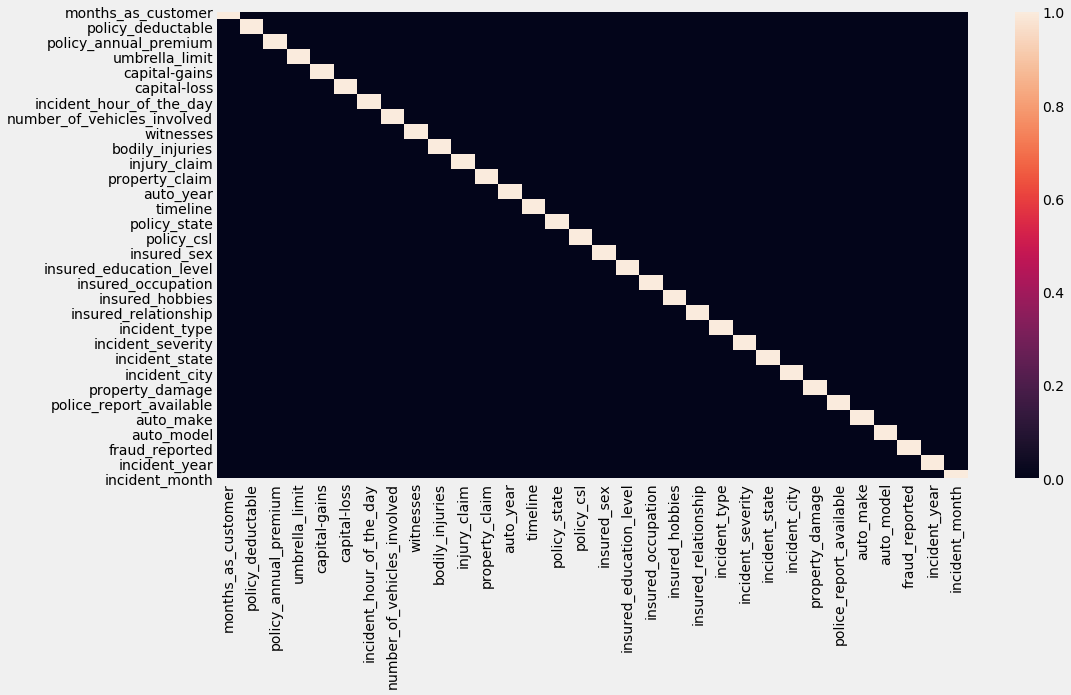

In [149]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.heatmap(df_atg.corr()>=0.7)

In [146]:
df_atg.drop(['authorities_contacted','collision_type'],axis=1,inplace=True)

In [151]:
print(df_atg.shape)
df_atg.head()

(1000, 32)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,bodily_injuries,...,incident_severity,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,incident_year,incident_month
0,328,1000,1406.91,0,53300,0,5,1,2,1,...,0.395,0.706,0.738,0.742,0.771,0.775,0.771,1,0.744,0.692
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0.893,0.773,0.776,0.714,0.741,0.662,0.771,1,0.780,0.737
2,134,2000,1413.14,5000000,35100,0,7,3,3,2,...,0.893,0.779,0.738,0.805,0.749,0.750,0.641,0,0.871,0.797
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,1,...,0.395,0.565,0.710,0.714,0.749,0.724,0.752,1,0.792,0.681
4,228,1000,1583.91,6000000,66000,-46000,20,1,1,0,...,0.893,0.779,0.710,0.805,0.749,0.809,0.771,0,0.744,0.737


In [152]:
df_atg['capital-loss']=np.abs(df['capital-loss'])

## RFE

In [153]:
X = df_atg.drop('fraud_reported',axis=1)
y = df_atg.fraud_reported

In [154]:
from sklearn.feature_selection import rfe
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [155]:
rfc = RandomForestClassifier(random_state=seed)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(8), scoring='accuracy',min_features_to_select=12)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=14,
                                       verbose=0, warm_start=False),
      min_features_to_select=12, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [156]:
support_list = list(rfecv.support_)

In [157]:
importance = []
for val, sup in list(zip(X.columns,support_list)):
    if sup == True:
        importance.append(val)

In [158]:
print(X[importance].shape)
X[importance].head()

(1000, 21)


,months_as_customer,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,...,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_severity,incident_state,incident_city,auto_make,incident_year,incident_month
0,328,1406.91,0,53300,0,5,2,6510,13020,2004,...,0.736,0.703,0.805,0.794,0.395,0.706,0.738,0.775,0.744,0.692
1,228,1197.22,5000000,0,0,8,0,780,780,2007,...,0.736,0.763,0.734,0.706,0.893,0.773,0.776,0.662,0.780,0.737
2,134,1413.14,5000000,35100,0,7,3,7700,3850,2007,...,0.736,0.724,0.708,0.787,0.893,0.779,0.738,0.750,0.871,0.797
3,256,1415.74,6000000,48900,62400,5,2,6340,6340,2014,...,0.736,0.754,0.708,0.759,0.395,0.565,0.710,0.724,0.792,0.681
4,228,1583.91,6000000,66000,46000,20,1,1300,650,2009,...,0.766,0.724,0.708,0.759,0.893,0.779,0.710,0.809,0.744,0.737


In [159]:
x_and_y = pd.concat([X[importance],df_atg.fraud_reported],axis=1)

In [160]:
x_and_y.shape

(1000, 22)

In [161]:
x_and_y = x_and_y[(np.abs(stats.zscore(x_and_y)) <= 2.5).all(axis=1)]
print(x_and_y.shape)
x_and_y.head()

(799, 22)


,months_as_customer,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,...,insured_occupation,insured_hobbies,insured_relationship,incident_severity,incident_state,incident_city,auto_make,incident_year,incident_month,fraud_reported
0,328,1406.91,0,53300,0,5,2,6510,13020,2004,...,0.703,0.805,0.794,0.395,0.706,0.738,0.775,0.744,0.692,1
1,228,1197.22,5000000,0,0,8,0,780,780,2007,...,0.763,0.734,0.706,0.893,0.773,0.776,0.662,0.780,0.737,1
2,134,1413.14,5000000,35100,0,7,3,7700,3850,2007,...,0.724,0.708,0.787,0.893,0.779,0.738,0.750,0.871,0.797,0
4,228,1583.91,6000000,66000,46000,20,1,1300,650,2009,...,0.724,0.708,0.759,0.893,0.779,0.710,0.809,0.744,0.737,0
5,256,1351.10,0,0,0,19,2,6410,6410,2003,...,0.718,0.839,0.759,0.395,0.706,0.710,0.775,0.780,0.692,1


In [162]:
x_and_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 999
Data columns (total 22 columns):
months_as_customer          799 non-null int64
policy_annual_premium       799 non-null float64
umbrella_limit              799 non-null int64
capital-gains               799 non-null int64
capital-loss                799 non-null int64
incident_hour_of_the_day    799 non-null int64
witnesses                   799 non-null int64
injury_claim                799 non-null int64
property_claim              799 non-null int64
auto_year                   799 non-null int64
timeline                    799 non-null int64
insured_education_level     799 non-null float64
insured_occupation          799 non-null float64
insured_hobbies             799 non-null float64
insured_relationship        799 non-null float64
incident_severity           799 non-null float64
incident_state              799 non-null float64
incident_city               799 non-null float64
auto_make                   799 n

## Train-Test-Split

In [163]:
#X = df_atg.drop('fraud_reported',axis=1)
X = x_and_y[importance]
#y = df_atg.fraud_reported
y = x_and_y.fraud_reported

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed,test_size=0.25)

In [166]:
print(X_test.shape,X_train.shape)

(200, 21) (599, 21)


In [167]:
print('Do shapes match?')
print(X_test.shape[0]==y_test.shape[0])
print(X_train.shape[0]==y_train.shape[0])

Do shapes match?
True
True


In [168]:
for col in X_train:
    X_train[col] = scaler.fit_transform(X_train[[col]])

## PCA

In [ ]:
for col in num_list:
    X_train[col] = ss.fit_transform(X_train[[col]])

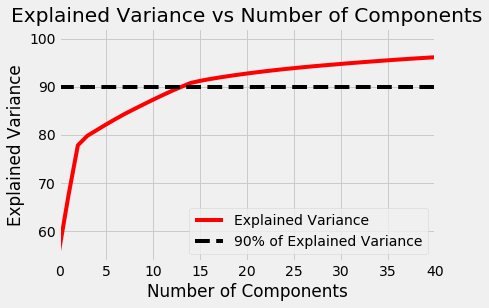

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,40)
plt.legend(loc='best');

In [99]:
print('16 components')

16 components


In [100]:
pca_fraud = PCA(n_components=16)

In [101]:
X_train_pca = pd.DataFrame(pca_fraud.fit_transform(X_train))

In [102]:
X_test_pca = pd.DataFrame(pca_fraud.transform(X_test))

In [103]:
print(X_train_pca.shape)
X_train_pca.head()

(750, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-11.897343,3.424715,2.215619,-0.715420,-1.989046,1.751572,-0.377046,-0.563441,-0.459262,-0.312004,-0.421399,-0.374773,0.105695,-1.375801,-0.952515,0.044643
1,3.129132,-2.006242,10.110617,-0.257873,-1.106101,-2.089449,-0.960770,0.672051,0.569144,0.565327,0.177525,2.042058,0.423713,-0.038670,-1.499511,0.802787
2,-4.695753,-1.195503,-1.292624,-2.285974,1.003573,-0.293552,0.735770,-0.908858,0.024421,-0.232733,1.055763,-1.447564,0.713663,0.210165,-1.883463,-0.032908
3,-11.660784,-2.478227,-1.871733,2.740960,1.455652,-0.619140,-1.800088,0.193870,0.095776,-0.154748,-1.232900,0.484199,0.526399,0.351893,0.601154,0.317039
4,-10.856201,-2.697338,5.748237,0.231945,-1.595930,1.134668,0.861011,0.232785,-2.080350,-0.696625,0.904209,-0.286016,1.777729,-0.403436,-0.439012,0.204672


#### Transformaton and filter outliers

In [104]:
train_pca = X_train_pca.copy()
train_pca['fraud_reported']=y_train

In [105]:
train_pca.iloc[:,0:11].columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [106]:
for col in train_pca.iloc[:,0:11].columns:
    train_pca[col]=list(stats.boxcox(abs(train_pca[col]+0.5)))[0]

In [107]:
print(train_pca.shape)
train_pca.head()

(750, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,fraud_reported
0,6.596872,2.033141,1.118117,-1.022252,0.439050,0.978212,-1.401038,-1.729632,-1.837104,-1.184848,-1.542432,-0.374773,0.105695,-1.375801,-0.952515,0.044643,1.0
1,2.120963,0.459084,3.102679,-0.971966,-0.444694,0.514816,-0.662833,0.163503,0.067729,0.064168,-0.358295,2.042058,0.423713,-0.038670,-1.499511,0.802787,NaN
2,2.506634,-0.329361,-0.226529,0.687583,0.450847,-1.132362,0.221251,-0.761652,-0.571302,-1.001994,0.487037,-1.447564,0.713663,0.210165,-1.883463,-0.032908,0.0
3,6.477487,0.826757,0.327397,1.676297,0.792291,-1.373340,0.277223,-0.341874,-0.469388,-0.850038,-0.290767,0.484199,0.526399,0.351893,0.601154,0.317039,NaN
4,6.065953,0.983724,2.259741,-0.285819,0.093663,0.549534,0.328764,-0.293713,0.500580,-1.163064,0.365664,-0.286016,1.777729,-0.403436,-0.439012,0.204672,0.0


In [108]:
X_train_pca = train_pca.drop('fraud_reported',axis=1)
y_train_pca = train_pca['fraud_reported']

In [109]:
X_test_pca = X_test_pca
y_test_pca = y_test

In [110]:
print('Do shapes match?')
print(X_test_pca.shape[0]==y_test_pca.shape[0])
print(X_train_pca.shape[0]==y_train_pca.shape[0])

Do shapes match?
True
True


## Address imbalance in target feature

In [169]:
training  = pd.concat([X_train, y_train], axis=1)

In [170]:
#training  = pd.concat([X_train_pca, y_train_pca], axis=1)
#X_test=X_test_pca
#y_test=y_test_pca

In [171]:
round(training.fraud_reported.value_counts(),2)

0    495
1    104
Name: fraud_reported, dtype: int64

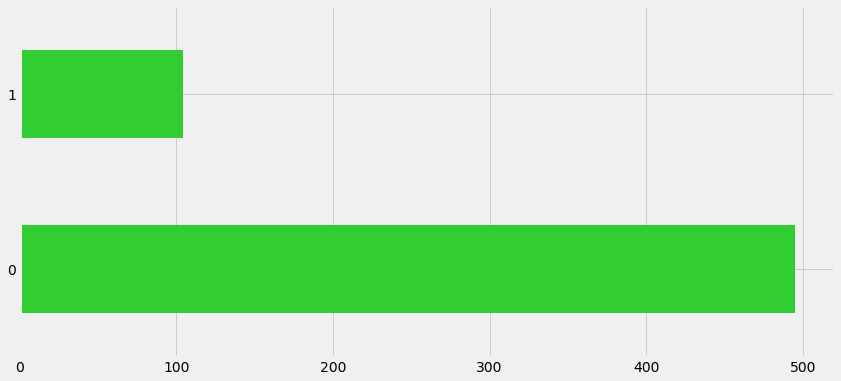

In [172]:
plt.tight_layout()
round(training.fraud_reported.value_counts(normalize=False),2).plot(kind='barh',color='limegreen')

In [173]:
from sklearn.utils import resample

In [174]:
true = training[training.fraud_reported==0]
fraud = training[training.fraud_reported==1]

In [175]:
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(true), # match number in majority class
                          random_state=seed) # reproducible results

In [176]:
upsampled = pd.concat([true, fraud_upsampled])

In [177]:
upsampled.fraud_reported.value_counts()

1    495
0    495
Name: fraud_reported, dtype: int64

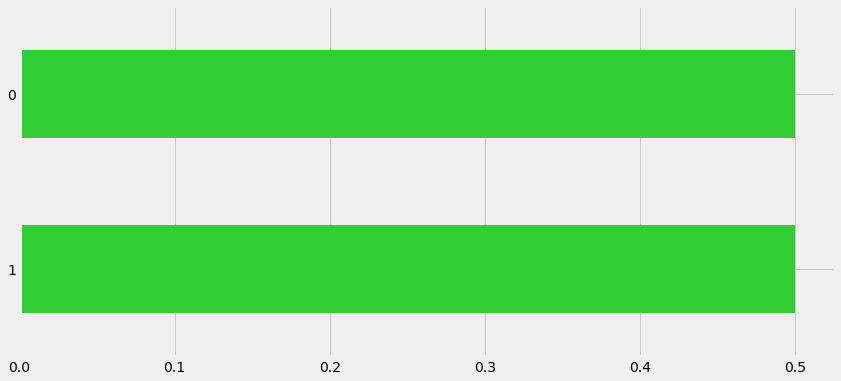

In [178]:
plt.tight_layout()
round(upsampled.fraud_reported.value_counts(normalize=True),2).plot(kind='barh',color='limegreen')

In [179]:
print(upsampled.shape)
upsampled.head()

(990, 22)


,months_as_customer,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,witnesses,injury_claim,property_claim,auto_year,...,insured_occupation,insured_hobbies,insured_relationship,incident_severity,incident_state,incident_city,auto_make,incident_year,incident_month,fraud_reported
209,0.843424,0.085164,0.0,0.277476,0.392094,0.347826,0.333333,0.092534,0.045833,0.35,...,0.462312,0.170616,0.397727,1.000000,1.000000,0.405797,0.574713,0.377451,1.000000,0
765,0.392484,0.659758,0.0,0.503808,0.000000,0.260870,0.000000,0.262881,0.260417,0.40,...,1.000000,0.336493,0.920455,0.884758,0.116279,0.405797,0.574713,0.078431,0.674419,0
695,0.603340,0.463417,0.0,0.508161,0.774573,0.391304,0.333333,0.015773,0.015625,0.55,...,0.331658,0.654028,0.261364,1.000000,1.000000,0.956522,0.477011,0.284314,0.063953,0
12,0.125261,0.458379,0.5,0.000000,0.000000,0.391304,0.000000,0.247634,0.490625,0.25,...,0.733668,0.170616,0.261364,0.884758,0.116279,0.811594,0.649425,0.294118,0.279070,0
193,0.039666,0.458787,0.0,0.466812,0.963675,0.347826,0.333333,0.067298,0.033333,1.00,...,1.000000,0.336493,1.000000,0.925651,0.635659,0.608696,0.913793,0.553922,0.662791,0


In [180]:
y_train = upsampled.fraud_reported
X_train = upsampled.drop('fraud_reported', axis=1)

In [181]:
print('Do shapes match?')
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

Do shapes match?
(200, 21)
(200,)
(990, 21)
(990,)


## Initial Models

In [216]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [217]:
# Logistic Regression
logreg = LogisticRegression(random_state=seed)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_log}, Precision: {p_score}, Recall: {r_score}, f1-score:{f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 62.0, Precision: 28.4, Recall: 56.1, f1-score:37.7
[[101  58]
 [ 18  23]]


In [218]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5980978677711306 [2 1 0]


In [219]:
# Support Vector Machine
svc = SVC(random_state=seed,C=1,gamma=1,kernel='rbf')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_svc}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 79.5, Precision: 0.0, Recall: 0.0 F1-Score 0.0
[[159   0]
 [ 41   0]]


In [220]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5 [1 0]


In [221]:
# kNN
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance',metric='manhattan')
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_knn}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 77.0, Precision: 44.9, Recall: 53.66 F1-Score 48.89
[[132  27]
 [ 19  22]]


In [222]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.6833870225494708 [2 1 0]


In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_gaussian}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

In [194]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.47507286393618653 [2 1 0]


In [195]:
# Linear SVC

linear_svc = LinearSVC(random_state=seed,C=0.01)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_linear_svc}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 21.5, Precision: 20.71, Recall: 100.0 F1-Score 34.31


In [197]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5062893081761006 [2 1 0]


In [198]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=seed)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_sgd}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 50.0, Precision: 22.94, Recall: 60.98 F1-Score 33.33


In [200]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5407271053842614 [2 1 0]


In [201]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=14,random_state=seed)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_decision_tree}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 86.5, Precision: 79.17, Recall: 46.34 F1-Score 58.46


In [203]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.7159840466329191 [2 1 0]


In [206]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=seed)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest
p_score = round(precision_score(y_test,Y_pred,average='binary')*100,2)
r_score = round(recall_score(y_test,Y_pred,average='binary')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='binary')*100,2)
print(f'Score: {acc_random_forest}, Precision: {p_score}, Recall: {r_score} F1-Score {f1}')
print(confusion_matrix(y_test, Y_pred))

Score: 79.5, Precision: 0.0, Recall: 0.0 F1-Score 0.0


In [208]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred)
print(auc(fpr,tpr), threshold)

0.5 [1 0]


## Initial summary

In [209]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False).T

,7,0,3,1,2,5,4,6
Model,Decision Tree,Support Vector Machines,Random Forest,KNN,Logistic Regression,Stochastic Gradient Decent,Naive Bayes,Linear SVC
Score,86.5,79.5,79.5,77,62,50,41,21.5


In [210]:
importances = random_forest.feature_importances_
importance_df = pd.DataFrame(importances).T
importance_df.columns = X_train.columns
importance_df.T.head()

,0
months_as_customer,0.050485
policy_annual_premium,0.045293
umbrella_limit,0.006762
capital-gains,0.023593
capital-loss,0.021177


In [211]:
importance_df_sorted=pd.DataFrame(importance_df.T[0].sort_values())
importance_df_sorted[::-1].head(11)

,0
incident_severity,0.332539
property_claim,0.070861
injury_claim,0.057929
months_as_customer,0.050485
incident_year,0.046958
policy_annual_premium,0.045293
insured_occupation,0.042638
insured_hobbies,0.042630
timeline,0.037571
auto_year,0.033212


## Regularization

In [183]:
import statsmodels
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV

## GridSearch

In [184]:
from sklearn.model_selection import GridSearchCV

In [191]:
## Logistic Regression
grid={"C":np.logspace(-40,40,100), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 673.4150657750856, 'penalty': 'l2'}
accuracy : 0.8627054361567638


In [209]:
## Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.498, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.498, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.612, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.701, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.604, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.578, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   11.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [210]:
print(grid.best_params_) 
  
print(grid.best_score_)
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9483293650793652
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [212]:
## KNN
grid_params = {'n_neighbors':[3,5,7,9,11,13],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']
    
}
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs = -1
)

gs_results = gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.4s finished


In [213]:
print(gs.best_score_)
print('')
print(gs.best_params_)

0.816436507936508

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [218]:
## Linear SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

bestlinearSVC = linearSVC.best_estimator_
bestlinearSVC.fit(X_train,y_train)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(X_train,y_train)

{'SVC__C': 0.01}


0.8680926916221033

In [ ]:
# Import
from sklearn.grid_search import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_split':np.arange(1,10),
        'min_samples_leaf':np.arange(1,10),
        'min_weight_fraction_leaf':np.arange(1,10)}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
#fit model to data
dtree_gscv.fit(X_train, y_train)
print(dtree_gscv.best_params_)
print(dtree_gscv.best_score_)

#### pipeline, grid search, k-fold cross validation, XGboost, hypothesis testing, RFE